In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("surveyMH.csv")

In [3]:
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

## Feature Description

**state**: _If you live in the United States, which state or territory do you live in?_

**self_employed**: _Are you self-employed?_

**family_history**: _Do you have a family history of mental illness?_

**treatment**: _Have you sought treatment for a mental health condition?_

**work_interfere**: _If you have a mental health condition, do you feel that it interferes with your work?_

**no_employees**: _How many employees does your company or organization have?_

**remote_work**: _Do you work remotely (outside of an office) at least 50% of the time?_

**tech_company**: _Is your employer primarily a tech company/organization?_

**benefits**: _Does your employer provide mental health benefits?_

**care_options**: _Do you know the options for mental health care your employer provides?_

**wellness_program**: _Has your employer ever discussed mental health as part of an employee wellness program?_

**seek_help**: _Does your employer provide resources to learn more about mental health issues and how to seek help?_

**anonymity**: _Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?_

**leave**: _How easy is it for you to take medical leave for a mental health condition?_

**mentalhealthconsequence**: _Do you think that discussing a mental health issue with your employer would have negative consequences?_

**physhealthconsequence**: _Do you think that discussing a physical health issue with your employer would have negative consequences?_

**coworkers**: _Would you be willing to discuss a mental health issue with your coworkers?_

**physhealthinterview**: _Would you bring up a physical health issue with a potential employer in an interview?_

**mentalvsphysical**: _Do you feel that your employer takes mental health as seriously as physical health?_

**obs_consequence**: _Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?_

**comments**: _Any additional notes or comments_

In [5]:
def bar_plot(categ_var):
    # get feature different categories
    var = df[categ_var]
    # count number of categorical variable
    var_value = var.value_counts()
    
    plt.figure(figsize = (8,2))
    plt.bar(var_value.index, var_value, color=['green', 'blue', 'cyan'])
    plt.xticks(var_value.index, var_value.values)
    plt.ylabel("Frequency")
    plt.title(categ_var)
    plt.show()
    print(f"{categ_var}:\n{var_value}")

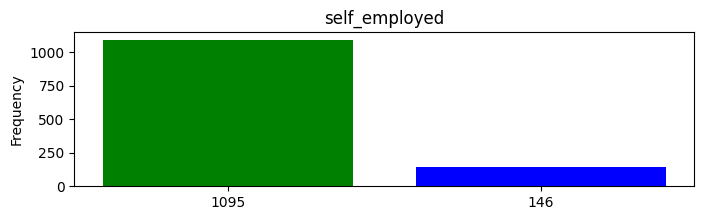

self_employed:
No     1095
Yes     146
Name: self_employed, dtype: int64


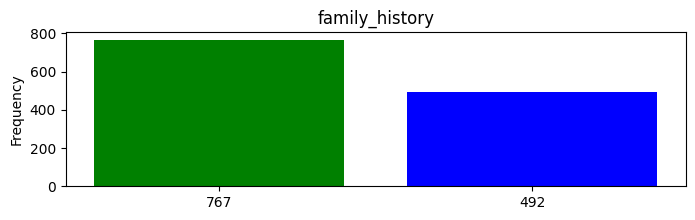

family_history:
No     767
Yes    492
Name: family_history, dtype: int64


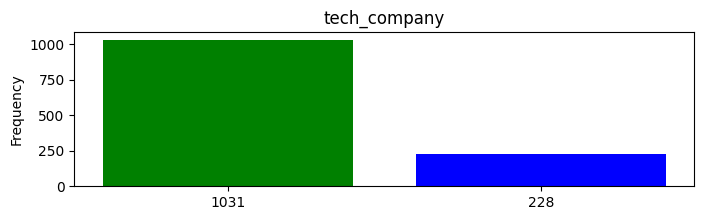

tech_company:
Yes    1031
No      228
Name: tech_company, dtype: int64


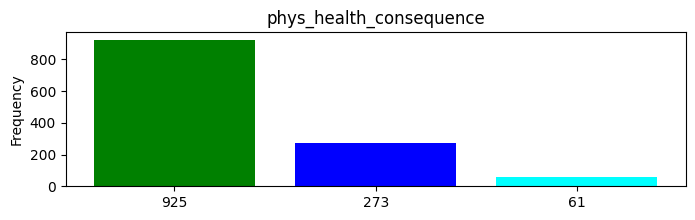

phys_health_consequence:
No       925
Maybe    273
Yes       61
Name: phys_health_consequence, dtype: int64


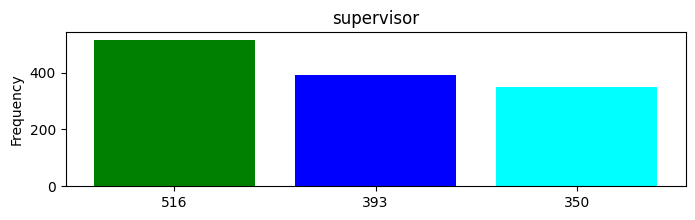

supervisor:
Yes             516
No              393
Some of them    350
Name: supervisor, dtype: int64


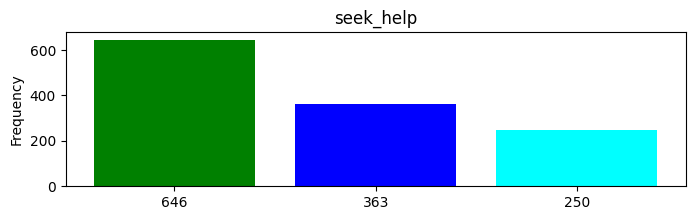

seek_help:
No            646
Don't know    363
Yes           250
Name: seek_help, dtype: int64


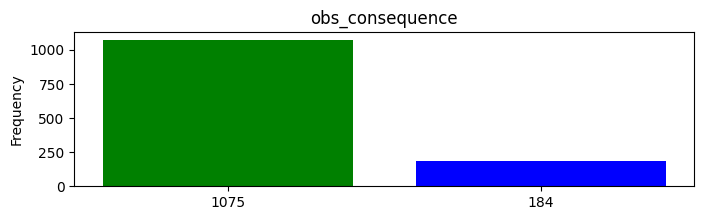

obs_consequence:
No     1075
Yes     184
Name: obs_consequence, dtype: int64


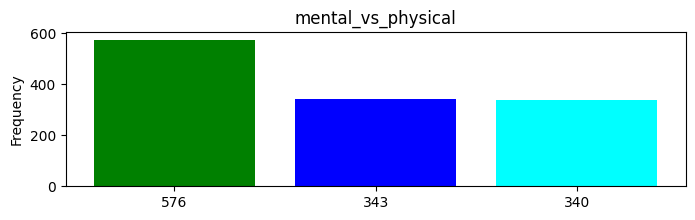

mental_vs_physical:
Don't know    576
Yes           343
No            340
Name: mental_vs_physical, dtype: int64


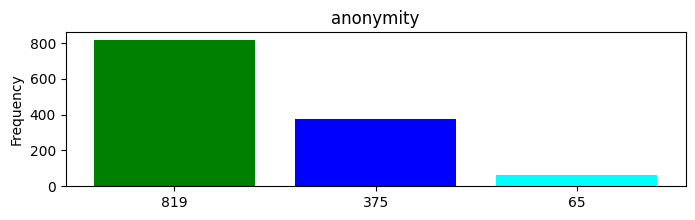

anonymity:
Don't know    819
Yes           375
No             65
Name: anonymity, dtype: int64


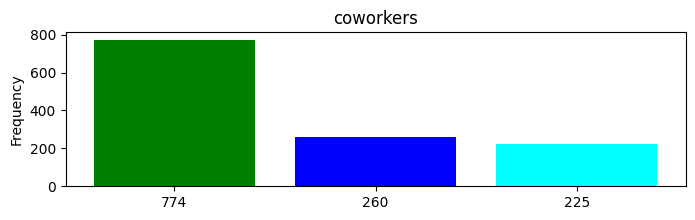

coworkers:
Some of them    774
No              260
Yes             225
Name: coworkers, dtype: int64


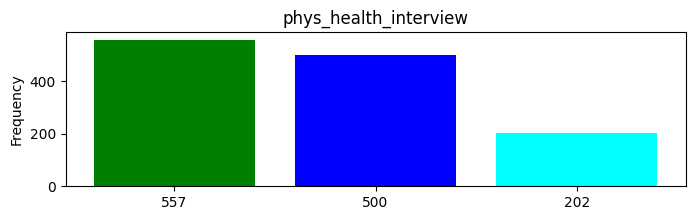

phys_health_interview:
Maybe    557
No       500
Yes      202
Name: phys_health_interview, dtype: int64


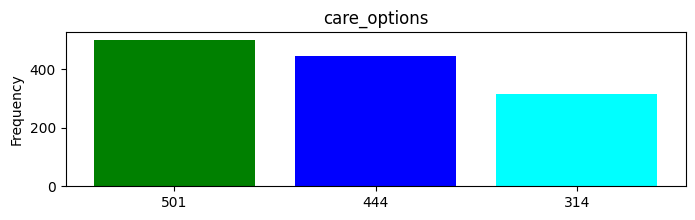

care_options:
No          501
Yes         444
Not sure    314
Name: care_options, dtype: int64


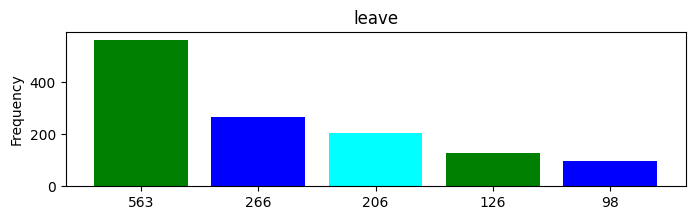

leave:
Don't know            563
Somewhat easy         266
Very easy             206
Somewhat difficult    126
Very difficult         98
Name: leave, dtype: int64


In [6]:
# variables that we want to visualize
categorical_vars = ["self_employed","family_history","tech_company","phys_health_consequence","supervisor","seek_help","obs_consequence","mental_vs_physical","anonymity","coworkers","phys_health_interview","care_options","leave"]
for c in categorical_vars:
    bar_plot(c)

### Finding missing values

In [7]:
df.columns[df.isnull().any()]

Index(['state', 'self_employed', 'work_interfere', 'comments'], dtype='object')

In [8]:
print("Missing values of state: {}".format(df["state"].isnull().sum()))
print("Missing values of work interfere: {}".format(df["work_interfere"].isnull().sum()))
print("Missing values of self employment: {}".format(df["self_employed"].isnull().sum()))
print("Missing values of comments: {}".format(df["comments"].isnull().sum()))

Missing values of state: 515
Missing values of work interfere: 264
Missing values of self employment: 18
Missing values of comments: 1095


In [9]:
# Filling the missing values
df[df["self_employed"].isnull()]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [10]:
df["self_employed"] = df["self_employed"].fillna("No")
df["self_employed"].isnull().any() #checking for any such null values

False

In [11]:
print("The dataset contains different age groups including: \n")
print(df['Age'].unique())
print("\n \n")
print("Types of Genders in the dataset: \n")
print(df['Gender'].unique())

The dataset contains different age groups including: 

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]

 

Types of Genders in the dataset: 

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Fem

### As we can see there is so much inconsistency in Gender categories and range errors in Age so we have to remove it seperately by grouping genders and dropping impractical age group like those in negative and very high values like above 100 

In [12]:
gender_values = df.Gender.value_counts().sort_values(ascending=False).to_frame()
gender_values = gender_values.rename(columns={'Gender': 'count'})
table_gender = gender_values.style.background_gradient(cmap='YlOrRd')
table_gender

,count
Male,615
male,206
Female,121
M,116
female,62
F,38
m,34
f,15
Make,4
Male,3


### Cleaning data for proper age

In [13]:
df.drop(df[df['Age'] < 0].index, inplace = True) 
df.drop(df[df['Age'] > 100].index, inplace = True)
df['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72])

Text(0.5, 0, 'Age')

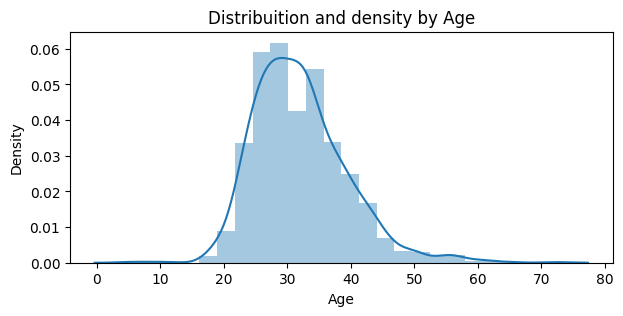

In [14]:
# Distribiution and density by Age
plt.figure(figsize=(7,3))
sns.distplot(df["Age"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")

 ### Here we can see that the optimal working age group lies from ***early to mid 20s and ends in mid to late 40s***

In [15]:
df.Gender = df.Gender.str.lower()
male = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "cis male"]
female = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]
other = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", 
         "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", 
         "female (trans)", "queer", "ostensibly male, unsure what that really means", "p", "a little about you"]

df.Gender.loc[df.Gender.isin(male)] = 'male'
df.Gender.loc[df.Gender.isin(female)] = 'female'
df.Gender.loc[df.Gender.isin(other)] = 'others'

gender_values = df.Gender.value_counts().sort_values(ascending=False).to_frame()
gender_values = gender_values.rename(columns={'Gender': 'count'})
table_gender = gender_values.style.background_gradient(cmap='copper')
table_gender

,count
male,988
female,247
others,19


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1254 non-null   object
 1   Age                        1254 non-null   int64 
 2   Gender                     1254 non-null   object
 3   Country                    1254 non-null   object
 4   state                      741 non-null    object
 5   self_employed              1254 non-null   object
 6   family_history             1254 non-null   object
 7   treatment                  1254 non-null   object
 8   work_interfere             991 non-null    object
 9   no_employees               1254 non-null   object
 10  remote_work                1254 non-null   object
 11  tech_company               1254 non-null   object
 12  benefits                   1254 non-null   object
 13  care_options               1254 non-null   object
 14  wellness

In [17]:
print(df['Country'].value_counts())
print("\n \n")
print(df['state'].unique())

United States             748
United Kingdom            184
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Mexico                      3
Russia                      3
Finland                     3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Czech Repu

Since the majority of survey is taken from United States , making conclusions like USA have max number of employees going through mental illness in workplace ***would be erroneous due to sampling bias so we gonna drop state and country as well as timestap and comments cause they don't have any huge cumulative impact on the data***

In [18]:
df.drop(columns=['Timestamp', 'Country', 'state', 'comments'], inplace = True)

**Note**: We have only two columns left that contain null values - work_interfere and self_employed. We gotta fill these null values and make our data ready for further processing.

Since, there are only 20% of work_interfere so let's change NaN to "Don't know.
There are only 1.4% of self employed so let's change NaN to NOT self_employed
We will be replacing the blank values with 'Don't Know' for work_interfere category

In [19]:
df['work_interfere'] = df['work_interfere'].fillna('Don\'t know' )
print(df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [20]:
df['self_employed'] = df['self_employed'].fillna('No')
print(df['self_employed'].unique())


['No' 'Yes']


In [21]:
df.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [22]:
df.columns


Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [23]:
list_col=['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

for col in list_col: 
    print('{} :{} ' . format(col.upper(),df[col].unique()))

AGE :[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49  5 53 61  8 11 72] 
GENDER :['female' 'male' 'others'] 
SELF_EMPLOYED :['No' 'Yes'] 
FAMILY_HISTORY :['No' 'Yes'] 
TREATMENT :['Yes' 'No'] 
WORK_INTERFERE :['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"] 
NO_EMPLOYEES :['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000'] 
REMOTE_WORK :['No' 'Yes'] 
TECH_COMPANY :['Yes' 'No'] 
BENEFITS :['Yes' "Don't know" 'No'] 
CARE_OPTIONS :['Not sure' 'No' 'Yes'] 
WELLNESS_PROGRAM :['No' "Don't know" 'Yes'] 
SEEK_HELP :['Yes' "Don't know" 'No'] 
ANONYMITY :['Yes' "Don't know" 'No'] 
LEAVE :['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy'] 
MENTAL_HEALTH_CONSEQUENCE :['No' 'Maybe' 'Yes'] 
PHYS_HEALTH_CONSEQUENCE :['No' 'Yes' 'Maybe'] 
COWORKERS :['Some of them' 'No' 'Yes'] 
SUPERVISOR :['Yes' 'No' 'Some of them'] 
MENTAL_HEALTH_INTERVIEW :['No' 'Yes' 'Maybe'] 
PHYS_HEALTH_INT

We can clearly see that all the columns except the 'Age', consist of object type values.
We also notice that most of the columns consist of values 'Yes', 'No' , 'Maybe' etc. which can be easily encoded

In [24]:
from sklearn.preprocessing import LabelEncoder
object_cols = ['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

label encoding is emcodimg categorical to numerical features so that they get fit for further machine learning processing 

In [25]:
df['treatment'].value_counts()

1    633
0    621
Name: treatment, dtype: int64

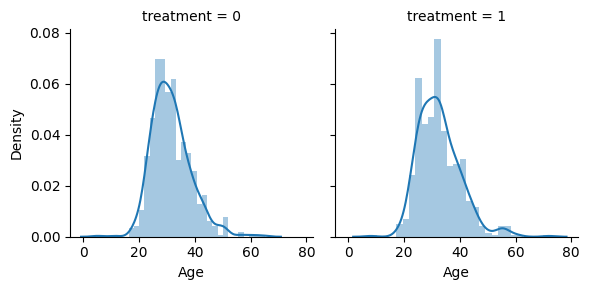

In [26]:
g = sns.FacetGrid(df, col='treatment')
g = g.map(sns.distplot, "Age")

We can see that the target column, i.e 'treatment' has almost equal values for both the categories. This means that we do not have to perform undersampling or oversampling.

<Axes: >

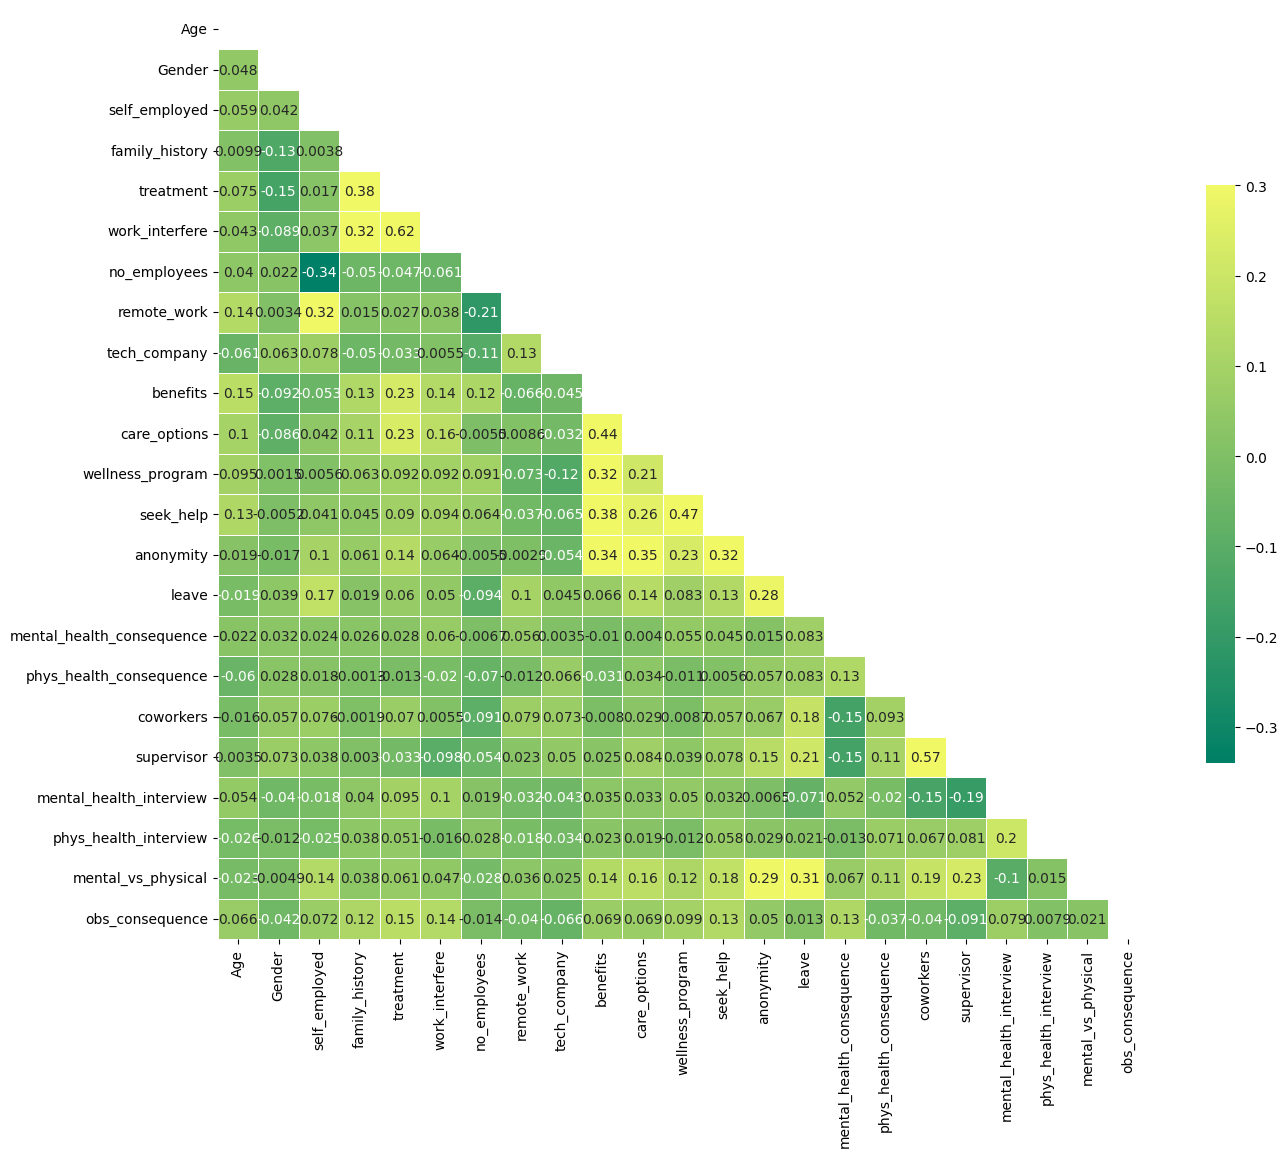

In [27]:
corr = df.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='summer', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from sklearn import metrics

In [29]:
from sklearn.model_selection import train_test_split
X = df.drop('treatment', axis = 1)
y = df['treatment']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                    test_size = 0.3,
                                                   random_state = 101)


In [30]:
key = ['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier','XGBClassifier']
value = [LogisticRegression(), KNeighborsClassifier(n_neighbors = 2, weights ='uniform'), DecisionTreeClassifier(random_state=10), RandomForestClassifier(n_estimators=58, random_state=1), GradientBoostingClassifier(random_state=8), AdaBoostClassifier(), xgb.XGBClassifier(random_state=16,booster="gbtree")]
models = dict(zip(key,value))
models

{'LogisticRegression': LogisticRegression(),
 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=2),
 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=10),
 'RandomForestClassifier': RandomForestClassifier(n_estimators=58, random_state=1),
 'GradientBoostingClassifier': GradientBoostingClassifier(random_state=8),
 'AdaBoostClassifier': AdaBoostClassifier(),
 'XGBClassifier': XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, mi

In [31]:
models.items()

dict_items([('LogisticRegression', LogisticRegression()), ('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=2)), ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=10)), ('RandomForestClassifier', RandomForestClassifier(n_estimators=58, random_state=1)), ('GradientBoostingClassifier', GradientBoostingClassifier(random_state=8)), ('AdaBoostClassifier', AdaBoostClassifier()), ('XGBClassifier', XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weigh

In [32]:
predicted =[]
d={}
for name,algo in models.items():
    algo.fit(X_train,y_train)
    predict = algo.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc) 
    d[name] = acc

In [33]:
d

{'LogisticRegression': 0.8037135278514589,
 'KNeighborsClassifier': 0.6631299734748011,
 'DecisionTreeClassifier': 0.7214854111405835,
 'RandomForestClassifier': 0.8143236074270557,
 'GradientBoostingClassifier': 0.8116710875331565,
 'AdaBoostClassifier': 0.8010610079575596,
 'XGBClassifier': 0.7931034482758621}

Text(0.5, 1.0, 'Plotting the Model Accuracies')

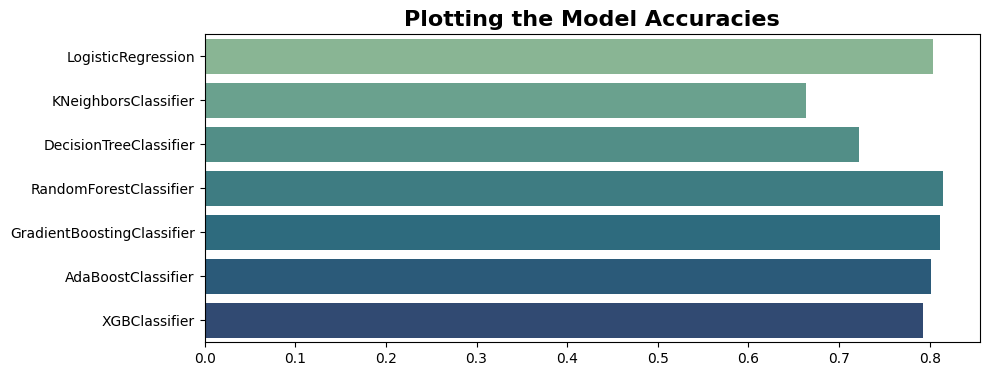

In [34]:
plt.figure(figsize = (10,4))
ax = sns.barplot(x = list(d.values()), y = list(d.keys()), palette='crest')
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")

Text(50.722222222222214, 0.5, 'Actual')

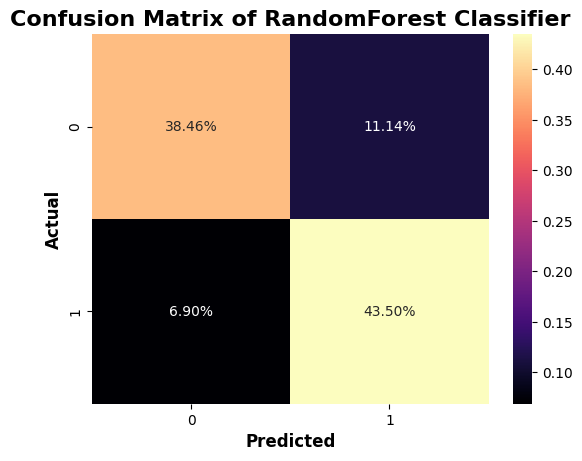

In [35]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
pred = rfc.predict(X_test)
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='magma')
plt.title('Confusion Matrix of RandomForest Classifier', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)

Text(50.722222222222214, 0.5, 'Actual')

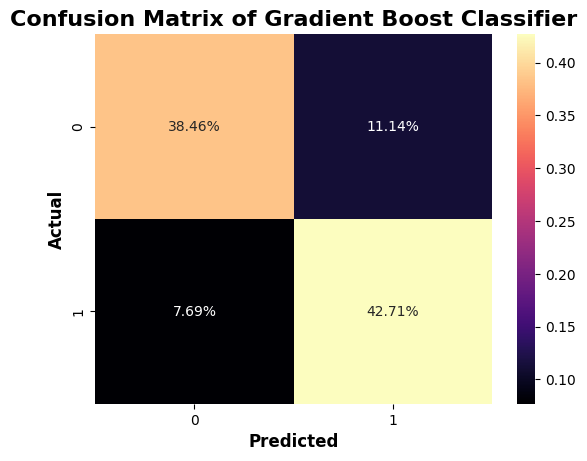

In [36]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
pred = gbc.predict(X_test)
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='magma')
plt.title('Confusion Matrix of Gradient Boost Classifier', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)

Text(50.722222222222214, 0.5, 'Actual')

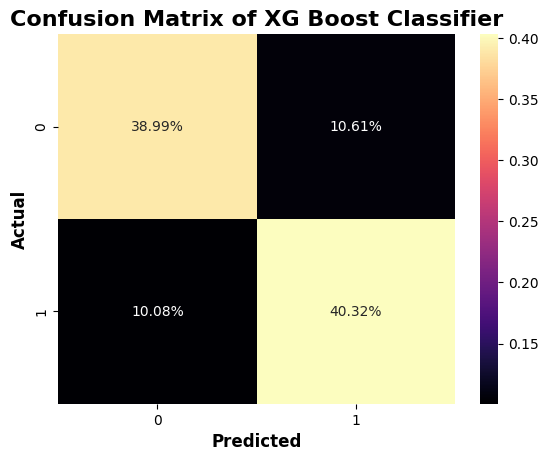

In [37]:
xgbc = XGBClassifier()
xgbc.fit(X_train,y_train)
pred = xgbc.predict(X_test)
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='magma')
plt.title('Confusion Matrix of XG Boost Classifier', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)

Text(50.722222222222214, 0.5, 'Actual')

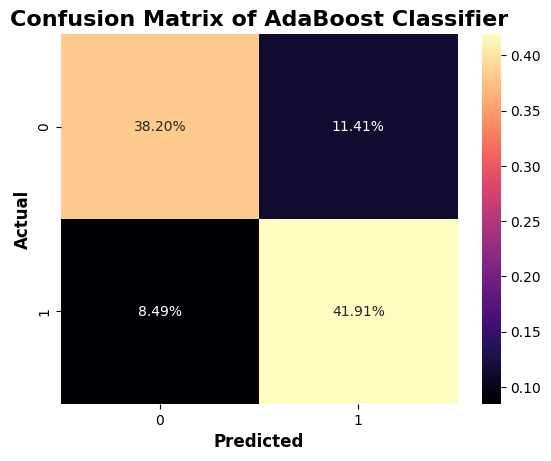

In [38]:
adbc = AdaBoostClassifier()
adbc.fit(X_train,y_train)
pred = adbc.predict(X_test)
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='magma')
plt.title('Confusion Matrix of AdaBoost Classifier', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)